# Having a look at the data

In [47]:
# imports
import os
import numpy as np
import warnings  # ignore future warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from astropy.table import Table

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook

from collections import Counter, OrderedDict
from operator import itemgetter

import cesium
from cesium.time_series import TimeSeries
import cesium.featurize
import schwimmbad

# fron sklearn
import sklearn 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import scipy.stats as spstat


# sns.set_palette("Reds")

%matplotlib inline

In [2]:
DATA_FOLDER = '../../data/'
data_files = ['sample_submission.csv', 'test_set.csv', 'test_set_metadata-csv',
             'test_set_sample.csv', 'training_set.csv', 'training_set_metadata.csv']

In [3]:
# read the test sample
test_sample = pd.read_csv(DATA_FOLDER+'test_set_sample.csv', engine='python')

In [4]:
# read the test sample
train = pd.read_csv(DATA_FOLDER+'training_set.csv', engine='python')

In [45]:
train_metadata = pd.read_csv(DATA_FOLDER+'training_set_metadata.csv', engine='python')

In [41]:
test_metadata = pd.read_csv(DATA_FOLDER+'test_set_metadata.csv', engine='python')


In [43]:
test_metadata.describe()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
count,3.492890e+06,3.492890e+06,3.492890e+06,3.492890e+06,3.492890e+06,3.492890e+06,120393.000000,3.492890e+06,3.492890e+06,3.102380e+06,3.492890e+06
mean,6.528181e+07,1.705897e+02,-2.624964e+01,2.178545e+02,-1.843280e+01,9.426578e-03,0.305988,5.168159e-01,1.535211e-01,4.217862e+01,9.196644e-02
std,3.783131e+07,1.092068e+02,1.764381e+01,1.081992e+02,3.958926e+01,9.663188e-02,0.159928,4.491342e-01,2.752581e-01,1.587242e+00,1.551435e-01
min,1.300000e+01,0.000000e+00,-6.476086e+01,1.036900e-02,-8.967441e+01,0.000000e+00,0.007700,0.000000e+00,0.000000e+00,2.764620e+01,2.000000e-03
25%,3.252507e+07,7.277344e+01,-4.042390e+01,1.733004e+02,-5.280274e+01,0.000000e+00,0.192600,2.683000e-01,1.380000e-02,4.124470e+01,2.300000e-02
50%,6.530507e+07,1.611914e+02,-2.511770e+01,2.459314e+02,-2.448392e+01,0.000000e+00,0.295800,4.619000e-01,3.030000e-02,4.227200e+01,4.500000e-02
75%,9.805302e+07,2.758614e+02,-1.126298e+01,2.983127e+02,1.726843e+01,0.000000e+00,0.406000,6.557000e-01,1.432000e-01,4.308390e+01,9.100000e-02
max,1.307881e+08,3.598242e+02,4.181528e+00,3.599956e+02,6.606870e+01,1.000000e+00,1.201400,3.000000e+00,1.871400e+00,4.702610e+01,2.994000e+00


In [46]:
train_metadata.describe()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,5523.000000,7848.000000,7848.000000
mean,4.810375e+07,169.719379,-27.254846,230.466784,-20.115526,0.269623,0.254436,0.357885,0.155695,41.263961,0.081953,60.895387
std,4.347364e+07,114.212761,20.248556,97.416392,40.390899,0.443792,0.330053,0.545552,0.300367,2.262711,0.150598,28.767984
min,6.150000e+02,0.175781,-64.760857,0.107681,-89.615573,0.000000,0.000000,0.000000,0.000000,31.996100,0.003000,6.000000
25%,3.180865e+05,62.402344,-44.597992,207.248509,-54.509752,0.000000,0.000000,0.000000,0.000000,39.845250,0.018000,42.000000
50%,4.131719e+07,150.996094,-27.279613,244.127187,-30.217582,0.000000,0.182750,0.210300,0.018000,41.167900,0.032000,65.000000
75%,8.665901e+07,282.875976,-8.838267,313.224277,16.913859,1.000000,0.350125,0.431200,0.122375,42.398550,0.076000,90.000000
max,1.307798e+08,359.824219,4.181528,359.943827,65.931317,1.000000,3.445100,2.999400,1.734800,47.025600,2.747000,95.000000


In [7]:
a = np.array(train['object_id'].value_counts().index)
a

array([   104397,      7409,    248547, ..., 119353712,  86237249,
        49575267])

In [8]:
ids_array = np.sort(a)
for id_ in ids_array:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-8-a41e3da24cd0>, line 3)

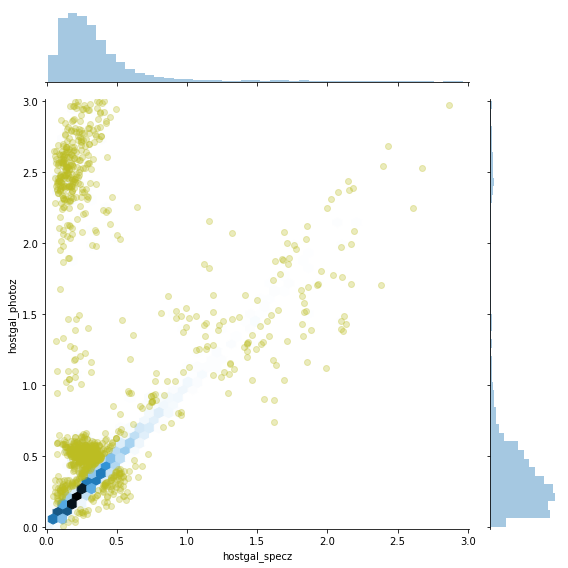

In [48]:
extragal = train_metadata['hostgal_specz'] != 0.
g = sns.jointplot(train_metadata['hostgal_specz'][extragal],\
              train_metadata['hostgal_photoz'][extragal], kind='hex',\
                  xlim=(-0.01, 3.01), ylim=(-0.01,3.01), height=8)

outliers = np.abs(train_metadata['hostgal_specz'] - train_metadata['hostgal_photoz']) > 0.1
fig = g.fig
fig.axes[0].scatter(train_metadata['hostgal_specz'][outliers],\
                    train_metadata['hostgal_photoz'][outliers], color='C8', alpha=0.3)
fig.tight_layout()

In [22]:
print(train_metadata['target'].value_counts())
train_metadata.head()

90    2313
42    1193
65     981
16     924
15     495
62     484
88     370
92     239
67     208
52     183
95     175
6      151
64     102
53      30
Name: target, dtype: int64


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [38]:
metafilename = DATA_FOLDER+'training_set_metadata.csv'
train_metadata = Table.read(metafilename, format='csv')
lcfilename = DATA_FOLDER+'training_set.csv'
lcdata = Table.read(lcfilename, format='csv')
pbmap = OrderedDict([(0,'u'), (1,'g'), (2,'r'), (3,'i'), (4, 'z'), (5, 'Y')])

# it also helps to have passbands associated with a color
pbcols = OrderedDict([(0,'blueviolet'), (1,'green'), (2,'red'),\
                      (3,'orange'), (4, 'black'), (5, 'brown')])

pbnames = list(pbmap.values())

In [39]:

nobjects = len(train_metadata)
tsdict = OrderedDict()
for i in tnrange(nobjects, desc='Building Timeseries'):
    row = train_metadata[i]
    thisid = row['object_id']
    target = row['target']
    
    meta = {'z':row['hostgal_photoz'],\
            'zerr':row['hostgal_photoz_err'],\
            'mwebv':row['mwebv']}
    
    ind = (lcdata['object_id'] == thisid)
    thislc = lcdata[ind]

    pbind = [(thislc['passband'] == pb) for pb in pbmap]
    t = [thislc['mjd'][mask].data for mask in pbind ]
    m = [thislc['flux'][mask].data for mask in pbind ]
    e = [thislc['flux_err'][mask].data for mask in pbind ]

    tsdict[thisid] = TimeSeries(t=t, m=m, e=e,\
                        label=target, name=thisid, meta_features=meta,\
                        channel_names=pbnames )
    
del lcdata



In [40]:


features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "maximum",
                   "max_slope",
                   "median",
                   "median_absolute_deviation",
                   "percent_close_to_median",
                   "minimum",
                   "skew",
                   "std",
                   "weighted_average"]



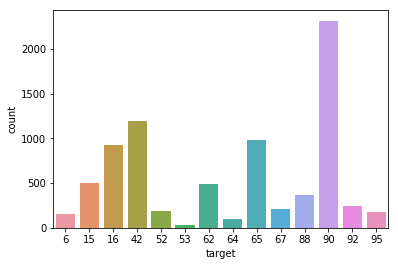

In [20]:
sns.countplot(train_metadata['target'])

In [9]:
test_sample.head()

,object_id,mjd,passband,flux,flux_err,detected
0,13,59798.3205,2,-1.299735,1.357315,0
1,13,59798.3281,1,-2.095392,1.148654,0
2,13,59798.3357,3,-0.923794,1.763655,0
3,13,59798.3466,4,-4.009815,2.602911,0
4,13,59798.3576,5,-3.403503,5.367328,0


# LightCurve analysis

In [90]:
train.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [73]:
array_train = train.values

train.head()
train_objects_ids = np.sort(np.array(train['object_id'].value_counts().index))


In [89]:
array_train[0:5]

array([[ 6.15000000e+02,  5.97504229e+04,  2.00000000e+00,
        -5.44810303e+02,  3.62295200e+00,  1.00000000e+00],
       [ 6.15000000e+02,  5.97504306e+04,  1.00000000e+00,
        -8.16434326e+02,  5.55337000e+00,  1.00000000e+00],
       [ 6.15000000e+02,  5.97504383e+04,  3.00000000e+00,
        -4.71385529e+02,  3.80121300e+00,  1.00000000e+00],
       [ 6.15000000e+02,  5.97504450e+04,  4.00000000e+00,
        -3.88984985e+02,  1.13950310e+01,  1.00000000e+00],
       [ 6.15000000e+02,  5.97524070e+04,  2.00000000e+00,
        -6.81858887e+02,  4.04120400e+00,  1.00000000e+00]])

In [72]:
train_objects_ids.shape

(7848,)

In [88]:
# train.loc('object_id'==[0])
# for object_id in train_object_ids: 
object_id = train_objects_ids[0]
train.loc[train['object_id'] == object_id].groupby(['object_id','passband'])
#.groupby(['object_id','passband']).aggregate(np.sum)

{'mjd': {(615, 0): 3797573.266000001,
  (615, 1): 3490193.7468,
  (615, 2): 3490193.2998000006,
  (615, 3): 3490194.1929,
  (615, 4): 3490194.830500002,
  (615, 5): 3430445.013499999},
 'flux': {(615, 0): -205.03692600000016,
  (615, 1): -22370.59483400001,
  (615, 2): -7780.500807000002,
  (615, 3): -7024.003067999998,
  (615, 4): -3245.366348999999,
  (615, 5): -2704.6412649999997},
 'flux_err': {(615, 0): 240.87724700000004,
  (615, 1): 291.682794,
  (615, 2): 196.05733299999997,
  (615, 3): 193.72670999999994,
  (615, 4): 220.32811600000005,
  (615, 5): 435.2531899999999},
 'detected': {(615, 0): 54,
  (615, 1): 56,
  (615, 2): 57,
  (615, 3): 57,
  (615, 4): 57,
  (615, 5): 52}}

In [ ]:
objects = np.zeros
for i, object_id in enumerate(train_object_ids):
    array_train[]

In [14]:
class LightCurve(object):
    '''Light curve object for PLAsTiCC formatted data'''
    
    _passbands = OrderedDict([(0,'C4'),\
                              (1,'C2'),\
                              (2,'C3'),\
                              (3,'C1'),\
                              (4,'k'),\
                              (5,'C5')])
    
    _pbnames = ['u','g','r','i','z','y']
    
    def __init__(self, filename):
        '''Read in light curve data'''

        self.DFlc     = Table.read(filename, format='ascii.csv')
        self.filename = filename.replace('.csv','')
        self._finalize()
     
    # this is some simple code to demonstrate how to calculate features on these multiband light curves
    # we're not suggesting using these features specifically
    # there also might be additional pre-processing you do before computing anything
    # it's purely for illustration
    def _finalize(self):
        '''Store individual passband fluxes as object attributes'''
        # in this example, we'll use the weighted mean to normalize the features
        weighted_mean = lambda flux, dflux: np.sum(flux*(flux/dflux)**2)/np.sum((flux/dflux)**2)
        
        # define some functions to compute simple descriptive statistics
        normalized_flux_std = lambda flux, wMeanFlux: np.std(flux/wMeanFlux, ddof = 1)
        normalized_amplitude = lambda flux, wMeanFlux: (np.max(flux) - np.min(flux))/wMeanFlux
        normalized_MAD = lambda flux, wMeanFlux: np.median(np.abs((flux - np.median(flux))/wMeanFlux))
        beyond_1std = lambda flux, wMeanFlux: sum(np.abs(flux - wMeanFlux) > np.std(flux, ddof = 1))/len(flux)
        
        for pb in self._passbands:
            ind = self.DFlc['passband'] == pb
            pbname = self._pbnames[pb]
            
            if len(self.DFlc[ind]) == 0:
                setattr(self, f'{pbname}Std', np.nan)
                setattr(self, f'{pbname}Amp', np.nan)
                setattr(self, f'{pbname}MAD', np.nan)
                setattr(self, f'{pbname}Beyond', np.nan)
                setattr(self, f'{pbname}Skew', np.nan)
                continue
            
            f  = self.DFlc['flux'][ind]
            df = self.DFlc['flux_err'][ind]
            m  = weighted_mean(f, df)
            
            # we'll save the measurements in each passband to simplify access.
            setattr(self, f'{pbname}Flux', f)
            setattr(self, f'{pbname}FluxUnc', df)
            setattr(self, f'{pbname}Mean', m)
            
            # compute the features
            std = normalized_flux_std(f, df)
            amp = normalized_amplitude(f, m)
            mad = normalized_MAD(f, m)
            beyond = beyond_1std(f, m)
            skew = spstat.skew(f) 
            
            # and save the features
            setattr(self, f'{pbname}Std', std)
            setattr(self, f'{pbname}Amp', amp)
            setattr(self, f'{pbname}MAD', mad)
            setattr(self, f'{pbname}Beyond', beyond)
            setattr(self, f'{pbname}Skew', skew)
        
        # we can also construct features between passbands
        pbs = list(self._passbands.keys())
        for i, lpb in enumerate(pbs[0:-1]):
            rpb = pbs[i+1]
            
            lpbname = self._pbnames[lpb]
            rpbname = self._pbnames[rpb]
            
            colname = '{}Minus{}'.format(lpbname, rpbname.upper())
            lMean = getattr(self, f'{lpbname}Mean', np.nan)
            rMean = getattr(self, f'{rpbname}Mean', np.nan)
            col = -2.5*np.log10(lMean/rMean) if lMean> 0 and rMean > 0 else -999
            setattr(self, colname, col)
    
    # this is a simple routine to visualize a light curve
    # it can plot vs the MJD array of the light curve
    # or vs an optional `phase` array that you pass 
    def plot_multicolor_lc(self, phase=None):
        '''Plot the multiband light curve'''

        fig, ax = plt.subplots(figsize=(8,6))

        
        if phase is None:
            phase = []
        if len(phase) != len(self.DFlc):
            phase = self.DFlc['mjd']
            xlabel = 'MJD'
        else:
            xlabel = 'Phase'
            
        for i, pb in enumerate(self._passbands):
            pbname = self._pbnames[pb]
            ind = self.DFlc['passband'] == pb
            if len(self.DFlc[ind]) == 0:
                continue
            ax.errorbar(phase[ind], 
                     self.DFlc['flux'][ind],
                     self.DFlc['flux_err'][ind],
                     fmt = 'o', color = self._passbands[pb], label = f'{pbname}')
        ax.legend(ncol = 4, frameon = True)
        ax.set_xlabel(f'{xlabel}', fontsize='large')
        ax.set_ylabel('Flux', fontsize='large')
        fig.suptitle(self.filename, fontsize='x-large')
        fig.tight_layout(rect=[0, 0, 1, 0.97])
    
    def get_features(self):
        '''Return all the features for this object'''
        variables = ['Std', 'Amp', 'MAD', 'Beyond', 'Skew']
        feats = []
        for i, pb in enumerate(self._passbands):
            pbname = self._pbnames[pb]
            feats += [getattr(self, f'{pbname}{x}', np.nan) for x in variables]
        return feats
